# ADS500B
# Final Project: Data Analysis and Preliminary Analytics

Team members:
- Ghassan Seba
- Landon Padgett
- Muris Saab

------------------------------------------------------------------------------

There are four sections of the final project. You and your team are expected to perform the following tasks within each section to fulfill the project requirements.

## 1\. Data Importing and Pre-processing

### 1.1 Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used.

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

# import dataset
dataset = 'online_shoppers_intention.csv'
df = pd.read_csv(dataset)

In [2]:
# Get the dimensions and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
# Get the file type (based on file extension)
file_type = os.path.splitext(dataset)[1]
print("\nThe file type for the data set is:", file_type)


The file type for the data set is: .csv


In [4]:
# Get the import method used
print("\nThe import method used was:", pd.read_csv.__module__)


The import method used was: pandas.io.parsers.readers


------------------------------------------------------------
### 1.2 Clean, wrangle, and handle missing data.

In [5]:
# Identify columns with missing values
cols_with_missing = df.columns[df.isna().any()].tolist()
print("\nThe following columns contain missing values:\n",\
      cols_with_missing)


The following columns contain missing values:
 ['Informational', 'PageValues', 'OperatingSystems']


According to the data description in the 'README.txt', missing data in the ```Informational``` and ```PageValues``` columns might indicate users didn't interact with any informational pages make any purchase on the website, so replacing them with zero's seems like a reasonable decision. On the other hand, the ```OperatingSystems``` column appears to be a categorical (ordinal) column and we can assume that the missing data is random. In this case, a common method of dealing with missing data is **mode imputation**, which involves replacing the missing values with the most frequent category in the column. This method is less sensitive to outliers than using the mean:

In [6]:
# Fill missing values with appropriate values
df['Informational'].fillna(0, inplace=True)
df['PageValues'].fillna(0, inplace=True)
df['OperatingSystems'].fillna(df['OperatingSystems']\
                              .mode()[0], inplace=True)

#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


In [7]:
# sum up all of the missing values in each row 
# to verify values were filled
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


------------------------------------------------------------
### 1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction.

**Aggregation Example #1:** Create a monthly view by aggregating the sum of all values by month

In [8]:
agg_df = df.groupby('Month').sum()
agg_df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Month,,,,,,,,,,,,,,,,
Aug,1358,46208.585717,235.0,15377.720000,16566,5.510590e+05,7.885283,16.335648,2547.019747,0.0,897.0,1030,1407,1521,96,76
Dec,3793,135799.069028,873.0,65745.780954,48347,1.919510e+06,34.797567,71.329893,11637.953958,0.0,3891.0,4513,5861,7026,366,216
Feb,100,3104.525000,16.0,439.000000,2058,8.666670e+04,8.651934,13.643285,163.826743,43.0,353.0,401,490,510,28,3
Jul,1047,34073.722728,222.0,19664.816667,15728,5.260049e+05,10.660237,19.582716,1773.106673,0.0,904.0,1028,1475,1591,104,66
June,655,17029.424392,160.0,5889.823333,10387,3.494527e+05,10.109304,16.773806,976.734639,0.0,614.0,667,919,1213,47,29
Mar,3600,135838.483159,790.0,58494.868338,37775,1.549024e+06,41.434902,85.051385,7545.613205,0.0,3964.0,4370,5785,6062,481,192
May,6610,233703.101976,1415.0,91376.868009,89105,3.303088e+06,90.379267,164.329829,18111.369911,714.4,7125.0,7969,10546,15060,715,365
Nov,7847,272618.063249,1915.0,130817.544862,138024,5.271677e+06,57.737874,114.530192,21246.628751,0.0,6334.0,6748,9095,13354,791,760
Oct,2042,69140.700580,267.0,21228.142381,18428,6.132207e+05,6.505344,15.927259,4699.322817,0.0,1128.0,1223,1753,2348,144,115


**Aggregation Example #2**: Create a ```Monthly``` view

In [9]:
# Groupby & multiple aggregations on different 
# columns grouped by Month
monthlySummary_df = df.groupby('Month').\
    aggregate({'PageValues': ['mean', 'median'],
                'ProductRelated_Duration': ['mean', 'median'],
                    'ExitRates': ['mean', 'median'],
                  'BounceRates': ['mean', 'median'],
                      'Revenue': 'sum'})

# Round the values to 2 decimal places
monthlySummary_df = monthlySummary_df.round(2)

monthlySummary_df

#https://sparkbyexamples.com/pandas/pandas-groupby-multiple-columns/

PageValues        ProductRelated_Duration         ExitRates         \
            mean median                    mean  median      mean median   
Month                                                                      
Aug         5.88    0.0                 1272.65  684.60      0.04   0.02   
Dec         6.74    0.0                 1111.47  611.08      0.04   0.02   
Feb         0.89    0.0                  471.01  214.92      0.07   0.05   
Jul         4.10    0.0                 1217.60  542.16      0.05   0.03   
June        3.39    0.0                 1213.38  464.31      0.06   0.04   
Mar         3.96    0.0                  812.28  438.43      0.04   0.02   
May         5.38    0.0                  981.89  535.73      0.05   0.03   
Nov         7.09    0.0                 1758.40  926.45      0.04   0.02   
Oct         8.56    0.0                 1116.98  572.87      0.03   0.02   
Sep         7.56    0.0                 1253.39  613.75      0.03   0.02   

      BounceRates        Revenue  
             mean median     sum  
Month                             
Aug          0.02   0.00      76  
Dec          0.02   0.00     216  
Feb          0.05   0.00       3  
Jul          0.02   0.01      66  
June         0.04   0.01      29  
Mar          0.02   0.00     192  
May          0.03   0.01     365  
Nov          0.02   0.00     760  
Oct          0.01   0.00     115  
Sep          0.01   0.00      86

**Aggregation Example #3**: by ```VisitorType```

In [10]:
# Groupby & multiple aggregations on different columns 
# grouped by VisitorType
visitorSummary_df = df.groupby('VisitorType').\
    aggregate({'PageValues': ['mean', 'median'],
  'ProductRelated_Duration': ['mean', 'median'],
                'ExitRates': ['mean', 'median'],
              'BounceRates': ['mean', 'median'],
                  'Revenue': 'sum'})

# Round the values to 2 decimal places
visitorSummary_df = visitorSummary_df.round(2)

visitorSummary_df

PageValues        ProductRelated_Duration         ExitRates  \
                        mean median                    mean  median      mean   
VisitorType                                                                     
New_Visitor            10.77    0.0                  636.39  414.25      0.02   
Other                  18.19    0.0                  570.40  136.50      0.06   
Returning_Visitor       4.96    0.0                 1289.42  655.54      0.05   

                         BounceRates        Revenue  
                  median        mean median     sum  
VisitorType                                          
New_Visitor         0.01        0.01   0.00     422  
Other               0.03        0.04   0.00      16  
Returning_Visitor   0.03        0.02   0.01    1470

**Normalization:**
Normalization is the process of scaling the features so that they have a similar range. There are different techniques for normalization, but we will use Min-Max scaling, which scales the values between 0 and 1 for the "duration" columns:

In [11]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# select the columns to be scaled
cols_to_scale = ['Administrative_Duration',\
                 'Informational_Duration', \
                 'ProductRelated_Duration']

# apply the scaler to the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,0.001000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,0.000042,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,0.009809,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


**Feature Construction:**
Feature construction is the process of creating new features from the existing ones. 

**Feature Constrution Example #1**: In this example we will create a ``Total_Duration`` column representing the sum of all durations:

In [12]:
df['Total_Duration'] = \
    df['Administrative_Duration'] + \
    df['Informational_Duration'] + \
    df['ProductRelated_Duration']
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False,0.000000
1,0,0.0,0.0,0.0,2,0.001000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False,0.001000
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False,0.000000
3,0,0.0,0.0,0.0,2,0.000042,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False,0.000042
4,0,0.0,0.0,0.0,10,0.009809,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False,0.009809


-------------------------------------------------------------------
### 1.4 Reduce redundant data and perform need based discretization.
One potential area to look at is the ```BounceRates``` and ```ExitRates``` columns. These two columns are highly correlated, as both measure the rate at which users leave the website. Let's check the correlation coefficient between these two columns:

In [13]:
df[['BounceRates', 'ExitRates']].corr()

,BounceRates,ExitRates
BounceRates,1.000000,0.913004
ExitRates,0.913004,1.000000


As we can see, the correlation coefficient between ```BounceRates``` and ```ExitRates``` is quite high, at ```0.91```. This suggests that these two variables are measuring essentially the same thing, and we may be able to drop one of them without losing much information. For the purposes of this exercise, let's drop the ```BounceRates``` column:

In [14]:
df = df.drop(columns=['BounceRates'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False,0.000000
1,0,0.0,0.0,0.0,2,0.001000,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False,0.001000
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False,0.000000
3,0,0.0,0.0,0.0,2,0.000042,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False,0.000042
4,0,0.0,0.0,0.0,10,0.009809,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False,0.009809


**Need-based discretization**

Now, let's perform need-based discretization on the ```ProductRelated_Duration``` column. We'll create three new columns: ```Low_Duration```, ```Medium_Duration```, and ```High_Duration```, which will indicate whether the duration is ```low``` (less than the 25th percentile), ```medium``` (between the 25th and 75th percentile), or ```high``` (greater than the 75th percentile):

In [15]:
def duration_discretizer(x):
    if x < np.percentile(df['ProductRelated_Duration'], 25):
        return 'Low_Duration'
    elif x > np.percentile(df['ProductRelated_Duration'], 75):
        return 'High_Duration'
    else:
        return 'Medium_Duration'

df['ProductRelated_Duration_Disc'] = \
    df['ProductRelated_Duration'].\
    apply(duration_discretizer)
df = pd.get_dummies(df, \
                    columns=['ProductRelated_Duration_Disc'])
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,...,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration,ProductRelated_Duration_Disc_High_Duration,ProductRelated_Duration_Disc_Low_Duration,ProductRelated_Duration_Disc_Medium_Duration
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.0,0.0,Feb,...,1,1,1,Returning_Visitor,False,False,0.000000,0,1,0
1,0,0.0,0.0,0.0,2,0.001000,0.10,0.0,0.0,Feb,...,2,1,2,Returning_Visitor,False,False,0.001000,0,1,0
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.0,0.0,Feb,...,1,9,3,Returning_Visitor,False,False,0.000000,0,1,0
3,0,0.0,0.0,0.0,2,0.000042,0.14,0.0,0.0,Feb,...,2,2,4,Returning_Visitor,False,False,0.000042,0,1,0
4,0,0.0,0.0,0.0,10,0.009809,0.05,0.0,0.0,Feb,...,3,1,4,Returning_Visitor,True,False,0.009809,0,0,1


### 2. Data Analysis and Visualization
#### 2.1 Identify categorical, ordinal, and numerical variables within data


In [25]:
# resets dataframe based on original dataset 
dataset = 'online_shoppers_intention.csv'
df = pd.read_csv(dataset)

categorical_vars = []
ordinal_vars = []
numerical_vars = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_vars.append(column)
    elif df[column].dtype == 'int64':
        ordinal_vars.append(column)
    elif df[column].dtype == 'float64':
        numerical_vars.append(column)

print("Categorical variables: ", categorical_vars)
print("Ordinal variables: ", ordinal_vars)
print("Numerical variables: ", numerical_vars)


Categorical variables:  ['Month', 'VisitorType']
Ordinal variables:  ['Administrative', 'ProductRelated', 'Browser', 'Region', 'TrafficType']
Numerical variables:  ['Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems']


#### 2.2 Provide measures of centrality and distribution with visualizations


Variable: Administrative
Mean: 2.32
Median: 1.00
Mode: 0.00
Standard Deviation: 3.32
Variance: 11.03



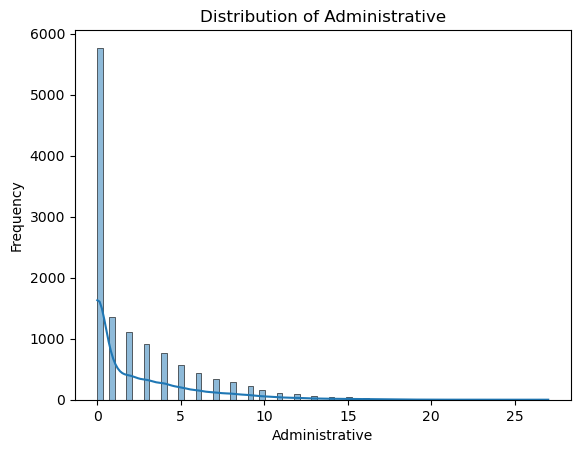

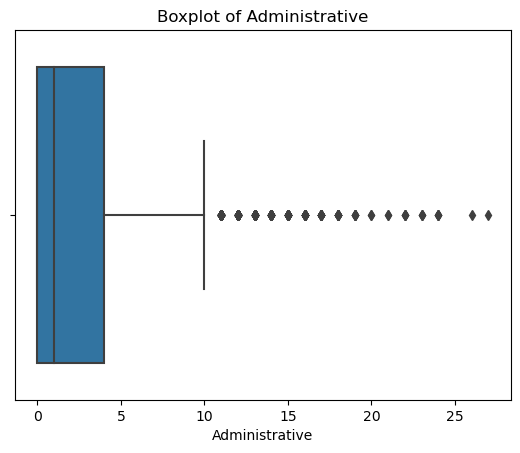

Variable: Administrative_Duration
Mean: 80.82
Median: 7.50
Mode: 0.00
Standard Deviation: 176.78
Variance: 31250.85



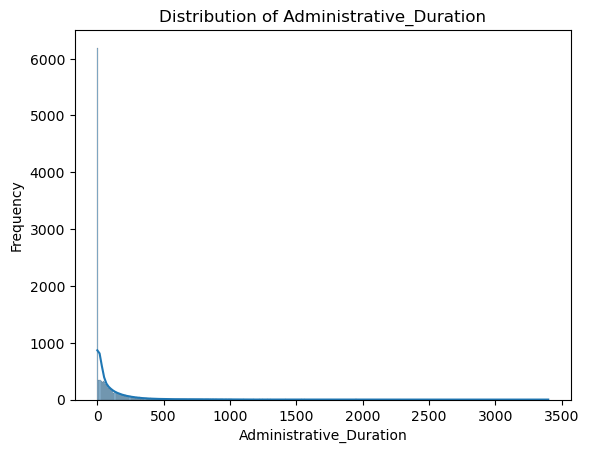

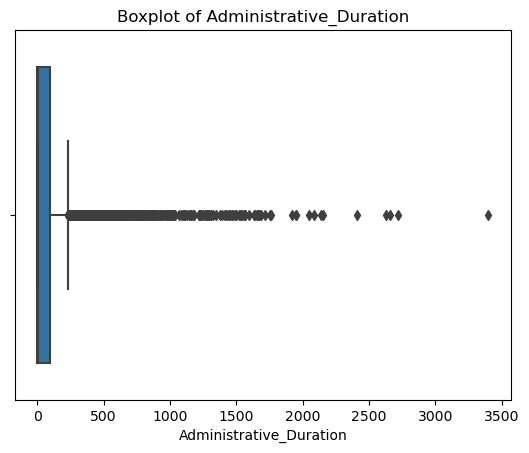

Variable: Informational
Mean: 0.50
Median: 0.00
Mode: 0.00
Standard Deviation: 1.27
Variance: 1.62



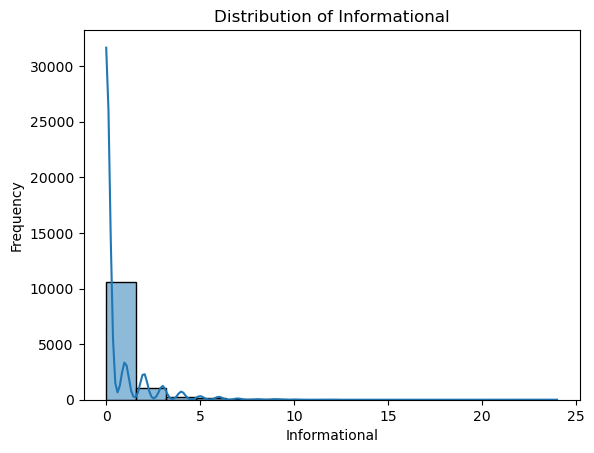

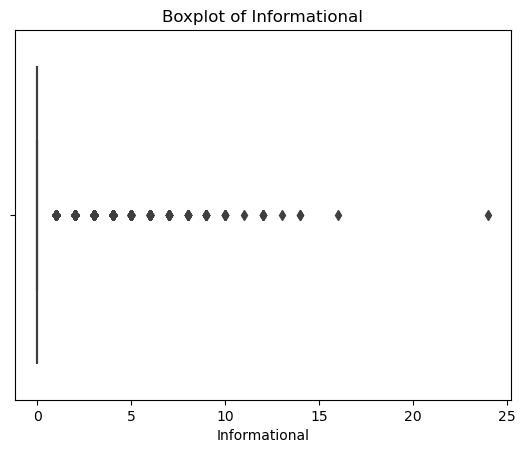

Variable: Informational_Duration
Mean: 34.47
Median: 0.00
Mode: 0.00
Standard Deviation: 140.75
Variance: 19810.36



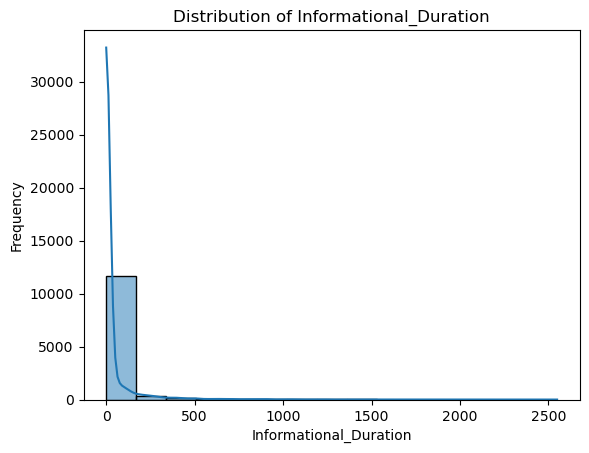

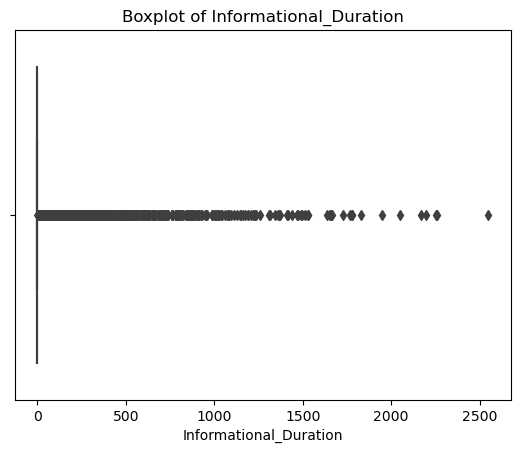

Variable: ProductRelated
Mean: 31.73
Median: 18.00
Mode: 1.00
Standard Deviation: 44.48
Variance: 1978.07



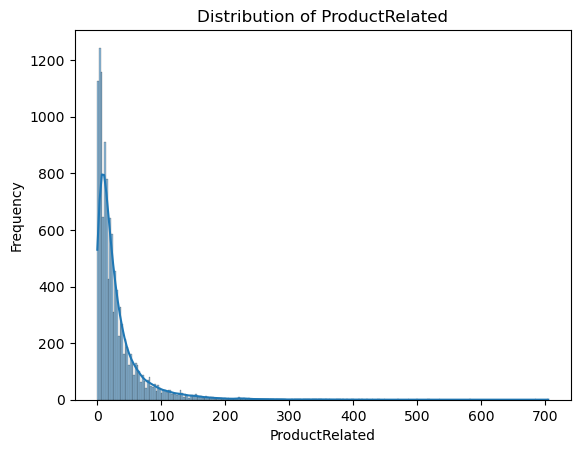

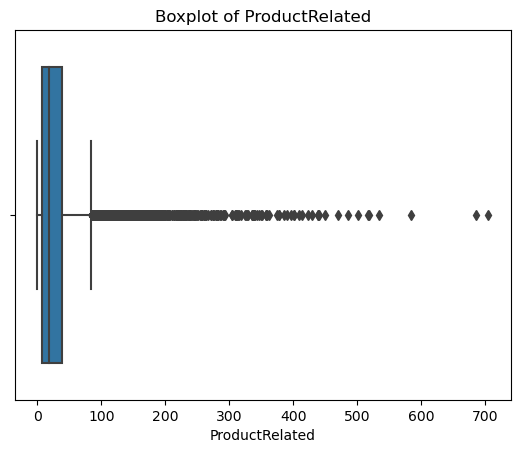

Variable: ProductRelated_Duration
Mean: 1194.75
Median: 598.94
Mode: 0.00
Standard Deviation: 1913.67
Variance: 3662130.14



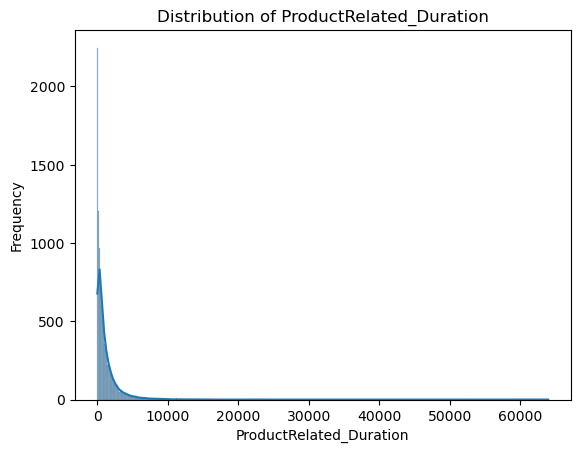

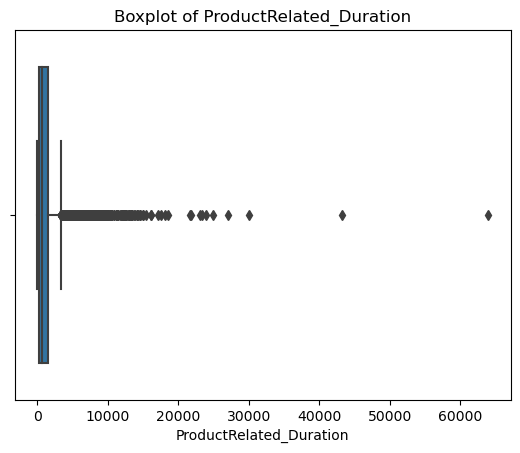

Variable: BounceRates
Mean: 0.02
Median: 0.00
Mode: 0.00
Standard Deviation: 0.05
Variance: 0.00



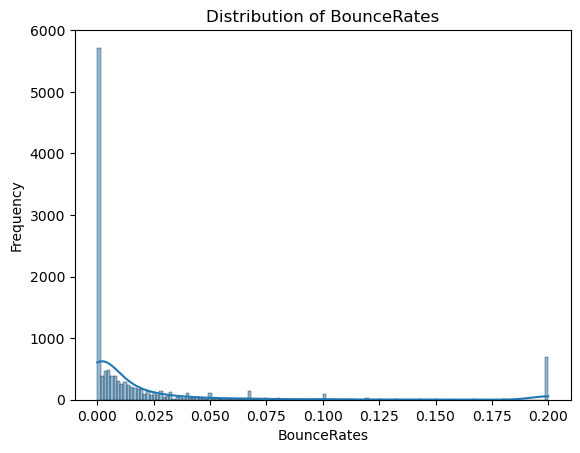

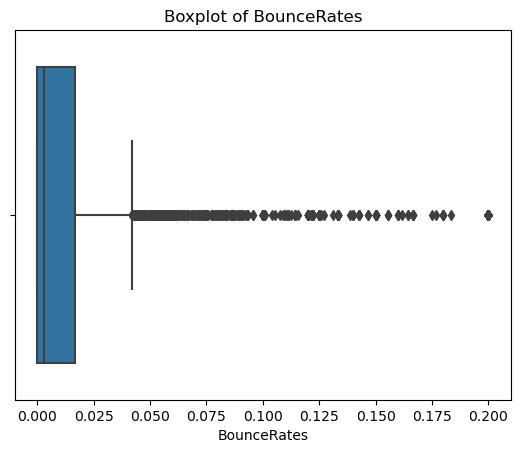

Variable: ExitRates
Mean: 0.04
Median: 0.03
Mode: 0.20
Standard Deviation: 0.05
Variance: 0.00



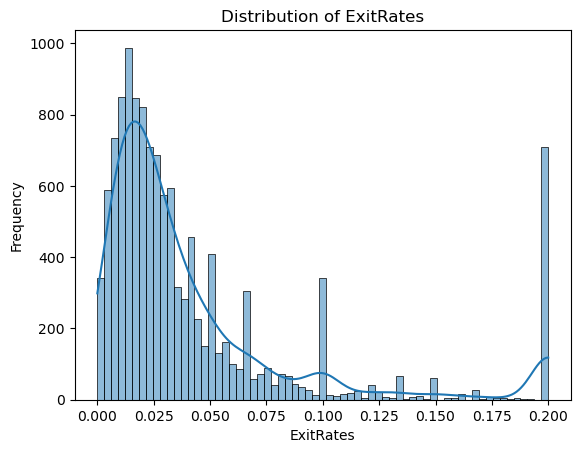

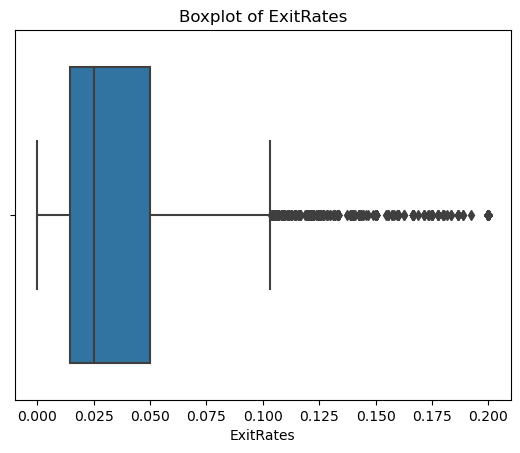

Variable: PageValues
Mean: 5.91
Median: 0.00
Mode: 0.00
Standard Deviation: 18.63
Variance: 347.16



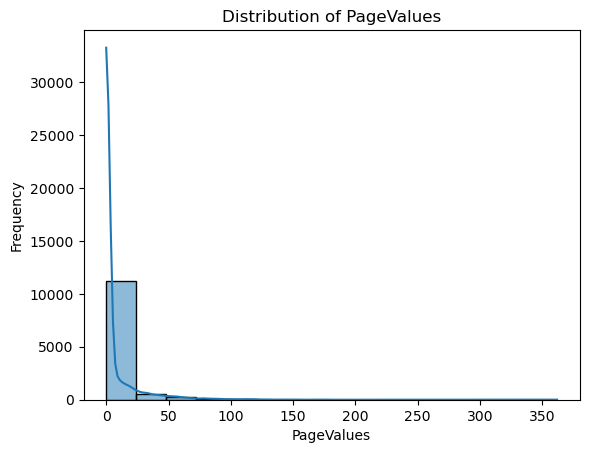

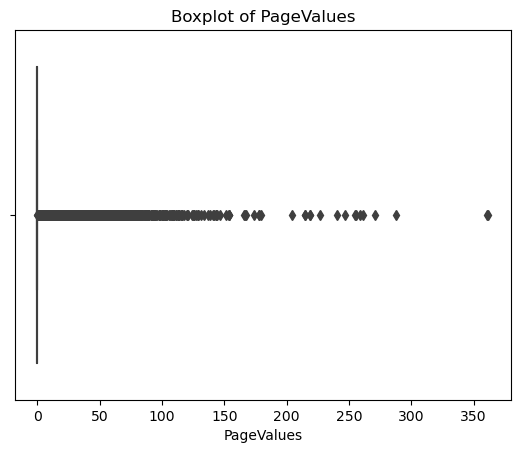

Variable: SpecialDay
Mean: 0.06
Median: 0.00
Mode: 0.00
Standard Deviation: 0.20
Variance: 0.04



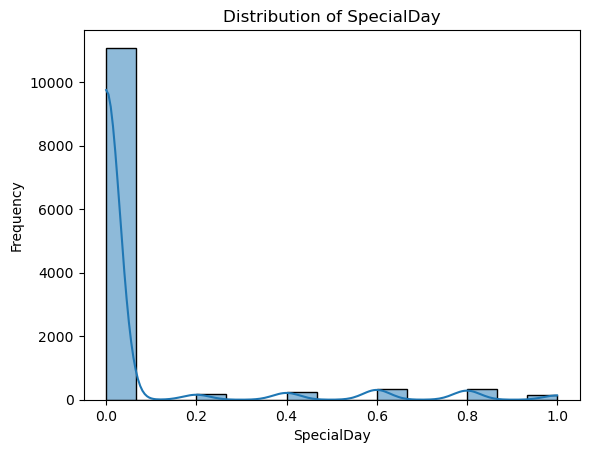

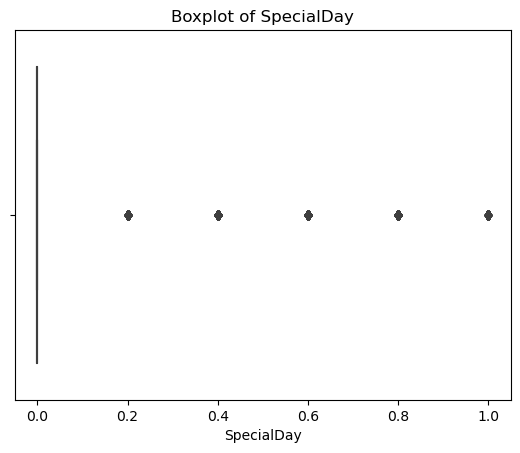

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_shoppers_intention.csv')

numerical_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

for var in numerical_vars:
    # Measures of centrality
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean():.2f}")
    print(f"Median: {df[var].median():.2f}")
    print(f"Mode: {df[var].mode()[0]:.2f}")
    print(f"Standard Deviation: {df[var].std():.2f}")
    print(f"Variance: {df[var].var():.2f}")
    print()
    
    # Distribution visualization
    sns.histplot(data=df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot visualization
    sns.boxplot(x=df[var])
    plt.title(f"Boxplot of {var}")
    plt.xlabel(var)
    plt.show()


#### 2.3 Diagnose for correlations between variables and determine independent and dependent variables


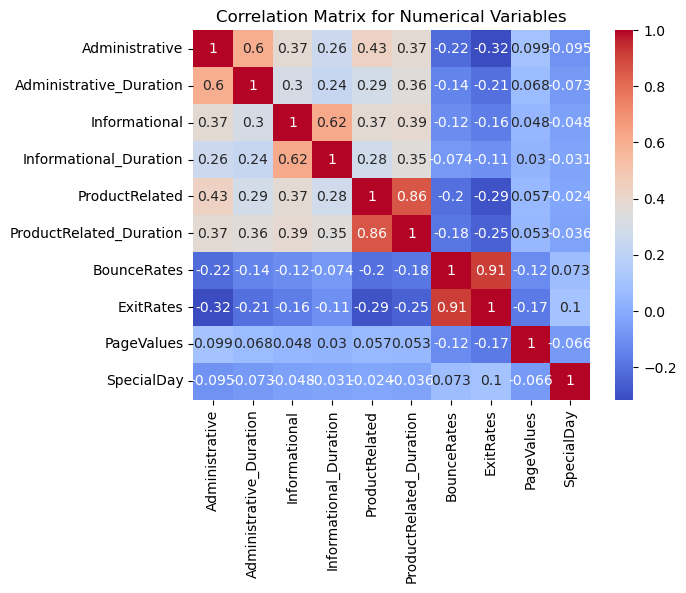

In [18]:
# Select the numerical variables
numerical_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Calculate correlation matrix
corr_matrix = df[numerical_vars].corr()

# Visualize correlation matrix as heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Variables")
plt.show()


```Revenue``` is a binary field and the **dependent variable**, indicating ```TRUE``` for a sale taking place and ```FALSE``` for no sale.

#### 2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
We can start by exploring the basic information about the dataset, such as its shape, column names, data types, and summary statistics.

In [19]:
# Shape of the dataset
print("\nShape (Rows, Columns):", df.shape)


Shape (Rows, Columns): (12330, 18)


In [20]:
# Data column names and data types
print("\nThe column names and data types are:\n\n", df.dtypes)


The column names and data types are:

 Administrative               int64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems           float64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


#### Visualizations to discover patterns

First, let's look at the distribution of the target variable ```Revenue``` using a bar chart. This will give us an idea of the proportion of customers who made a purchase.

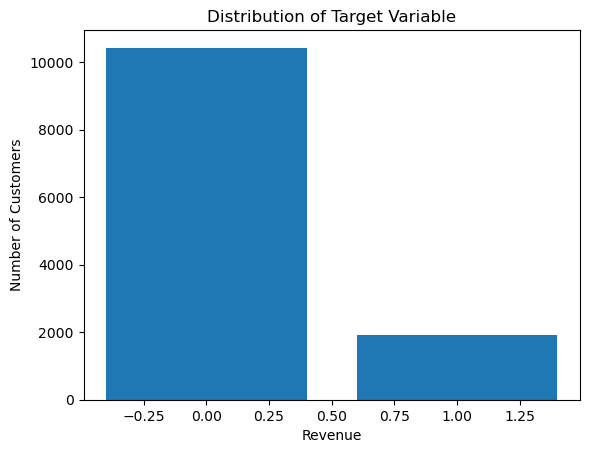

In [21]:
# Count the number of values for each category of the target variable
revenue_counts = df['Revenue'].value_counts()

# Plot the distribution of the target variable
plt.bar(revenue_counts.index, revenue_counts.values)
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.title('Distribution of Target Variable')
plt.show()


We can see that about **85%** of the customers did not make a purchase, while only about **15%** of the customers made a purchase.

#### Correlation between features
Next, let's investigate the correlation between the different features in the dataset using a correlation matrix heatmap. This will help us identify any patterns or relationships between the features.

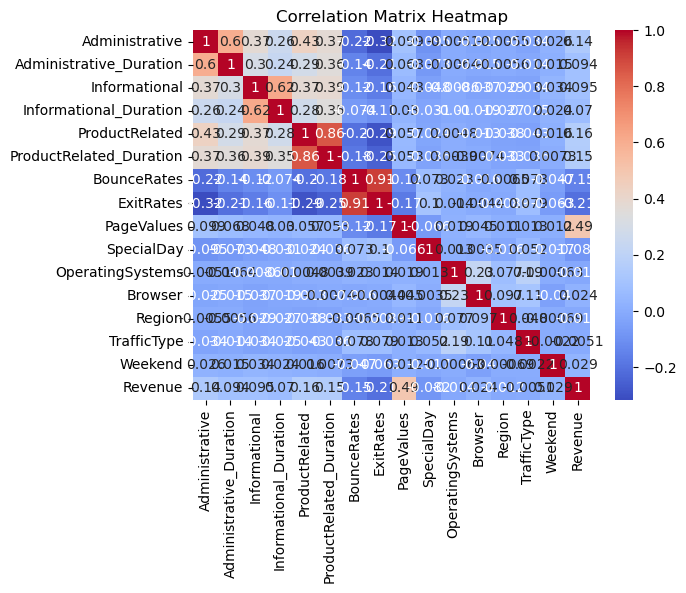

In [26]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see that some features are highly correlated with each other, such as ```Administrative``` and ```Administrative_Duration```, ```ProductRelated``` and ```ProductRelated_Duration```, and ```BounceRates``` and ```ExitRates```.

#### Distribution of numerical features
Let's now explore the distribution of the numerical features in the dataset using histograms. This will help us identify any patterns or outliers in the data.

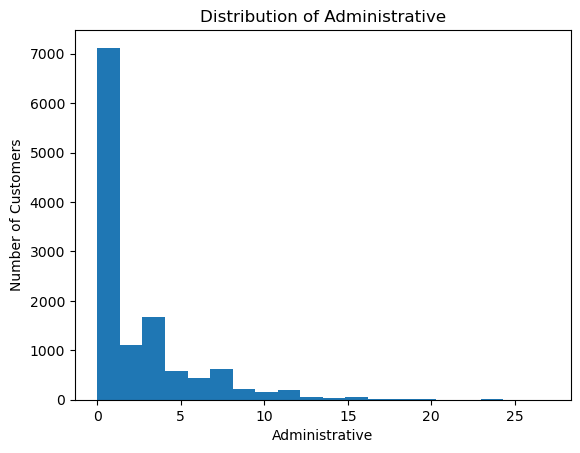

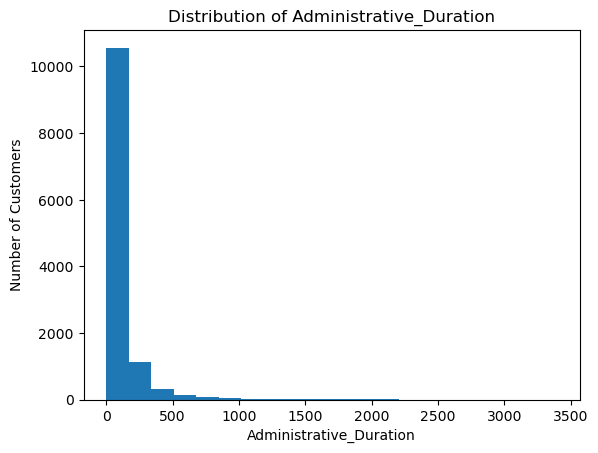

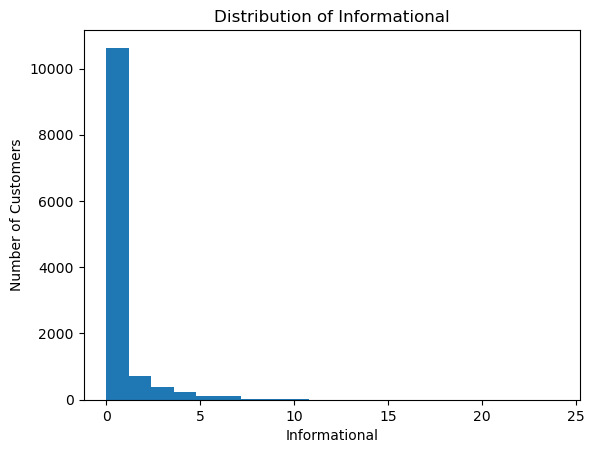

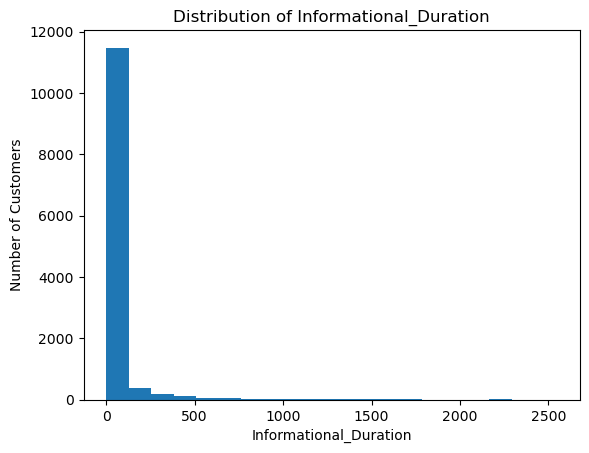

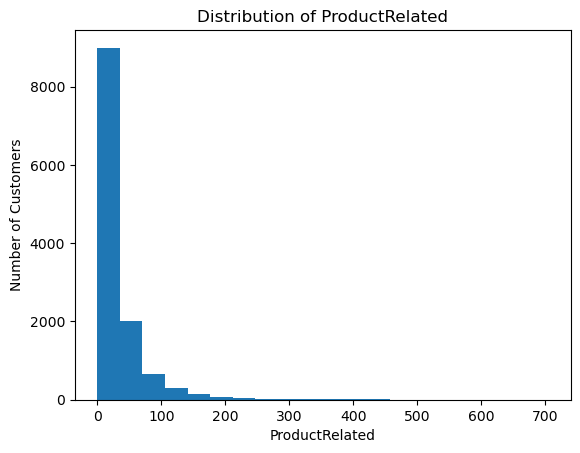

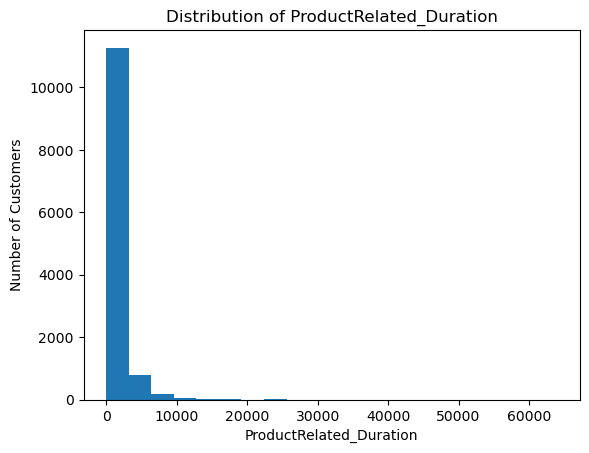

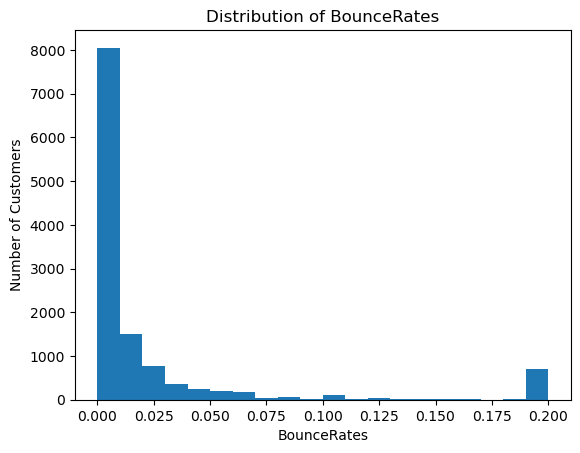

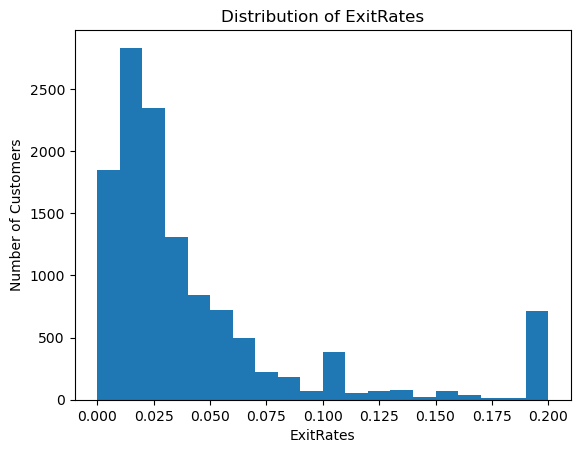

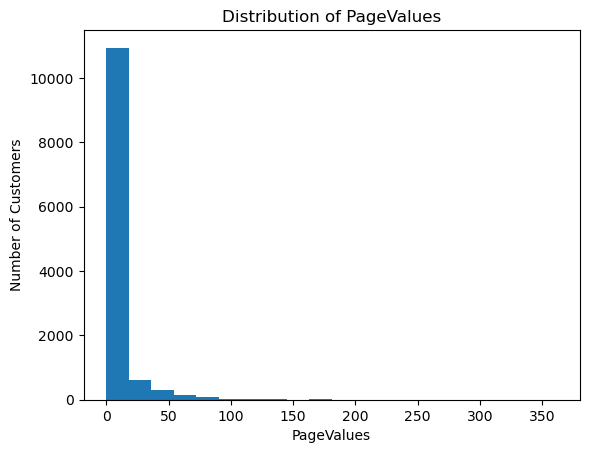

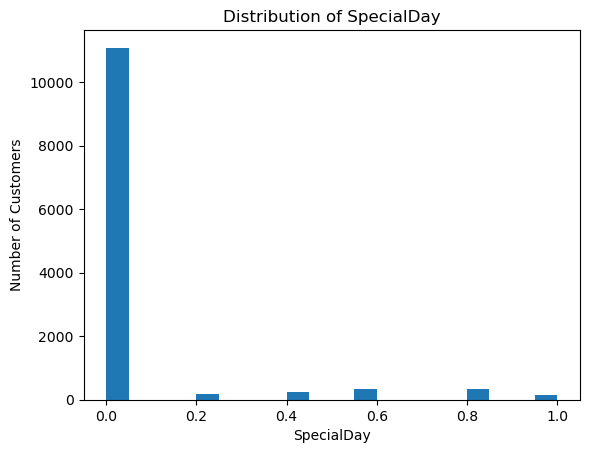

In [27]:
# Create a list of numerical feature names
num_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Plot histograms for each numerical feature
for feature in num_features:
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.title(f'Distribution of {feature}')
    plt.show()

We can see that most of the numerical features have skewed distributions, with a few outliers. We can also see some patterns in the data, such as a peak in the number of customers at low values of ```BounceRates``` and ```ExitRates```.

### 3. Data Analytics
#### 3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
The choice between supervised or unsupervised learning depends on the problem we want to solve and the available data.

In our case, the problem is to predict whether a customer will make a purchase (```Revenue``` variable) based on the values of the other features. Since the target variable is known for each data point, this is a **supervised** learning problem.

The dependent variable in this case is ```Revenue```, which is the variable we want to predict. The independent variables are all the other features in the dataset, such as ```Administrative```, ```Informational```, ```ProductRelated```, ```BounceRates```, ```ExitRates```, ```PageValues```, etc. These are the variables that we will use as input to the model to predict the value of the dependent variable.

#### 3.2 Train, test, and provide accuracy and evaluation metrics for model results

In [30]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("online_shoppers_intention.csv")

# Convert the "Month" column to numeric data
df["Month"] = LabelEncoder().fit_transform(df["Month"])
df["VisitorType"] = LabelEncoder().fit_transform(df["VisitorType"])


# Fill in missing values with the mean
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into training and testing sets
X_train,\
X_test,\
y_train,\ 
y_test = train_test_split(df.drop("Revenue",\
                          axis=1),\
                          df["Revenue"],\
                          test_size=0.2,\
                          random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


SyntaxError: unexpected character after line continuation character (3753384141.py, line 22)